# ***Data Visualizations***
Analyze data distributions

In [ ]:
import requests
from collections import Counter

import pandas as pd
import numpy as np
import json
import string
from sklearn.linear_model import LogisticRegression
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import Timedelta
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
nltk.download('stopwords')
nltk.download('punkt')

from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/Shared drives/CIS 520/data/USvideos_clean.csv')
df = df.fillna('')

def tag_tokenize(row):
  return [tag.replace('[none]', '').replace('"', '') for tag in str(row['tags']).split('|')]

df['tags'] = df.apply(tag_tokenize, axis=1)
df.head()


video_id trending_date  ... trending_period valid_thumbnail
0  2kyS6SvSYSE    2017-11-14  ...               1            True
1  1ZAPwfrtAFY    2017-11-14  ...               1            True
2  5qpjK5DgCt4    2017-11-14  ...               2            True
3  puqaWrEC7tY    2017-11-14  ...               1            True
4  d380meD0W0M    2017-11-14  ...               2            True

[5 rows x 19 columns]

## Draw category distributions

dict_keys([22, 24, 23, 28, 1, 25, 17, 10, 15, 27, 26, 2, 19, 20, 29, 43])


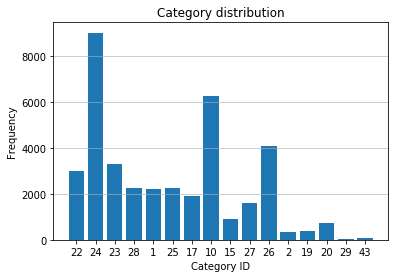

In [ ]:
plot_category = Counter(df['category_id'])
counts = plot_category.values()
ids = plot_category.keys()
print(ids)
bar_x_locs = np.arange(len(counts))

plt.bar(bar_x_locs, counts, align = 'center')
plt.xticks(bar_x_locs, ids)
plt.title('Category distribution')
plt.xlabel('Category ID')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
len(df['video_id'].unique())

5887

In [ ]:
len(df['trending_period'].unique())

307

## Draw Trending Period distributions

dict_keys([1, 2, 4, 207, 3, 5, 6, 908, 2424, 1983, 228, 10, 7, 0, 2862, 208, 909, 2863, 209, 26, 22, 9, 210, 27, 23, 516, 8, 3176, 11, 1704, 3177, 24, 1705, 538, 1706, 772, 37, 539, 330, 16, 773, 38, 379, 540, 331, 795, 774, 39, 3448, 380, 541, 332, 796, 12, 775, 40, 3449, 381, 3398, 542, 333, 797, 13, 776, 41, 3450, 382, 3399, 543, 334, 798, 14, 777, 42, 3451, 3400, 383, 2076, 778, 15, 247, 2202, 2077, 28, 779, 248, 2203, 2078, 249, 250, 1820, 2163, 251, 824, 1821, 2164, 1550, 825, 1822, 1551, 826, 1823, 1552, 827, 21, 1420, 1421, 3113, 581, 582, 25, 583, 2933, 584, 2411, 1285, 2934, 59, 2412, 1286, 2935, 29, 60, 2413, 1287, 2936, 2653, 61, 2414, 1288, 2937, 107, 1116, 1678, 2654, 62, 2415, 1289, 2938, 108, 1117, 1679, 2655, 63, 2416, 1290, 2939, 32, 109, 1118, 1680, 2656, 64, 2417, 17, 1291, 2940, 33, 110, 1119, 1681, 2657, 65, 2418, 18, 1292, 76, 34, 1642, 111, 1120, 1682, 30, 2658, 66, 2419, 77, 35, 1643, 112, 48, 1094, 3563, 47, 1531, 78, 36, 49, 146, 1949, 1095, 3564, 1532, 114, 

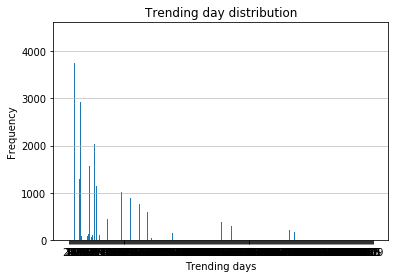

In [ ]:
plot_trending_days = Counter(df['trending_period'])
counts = plot_trending_days.values()
ids = plot_trending_days.keys()
print(ids)
bar_x_locs = np.arange(len(counts))

plt.bar(bar_x_locs, counts, align = 'center')
plt.xticks(bar_x_locs, ids)
plt.title('Trending day distribution')
plt.xlabel('Trending days')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

## Draw WordCloud for each category

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

22


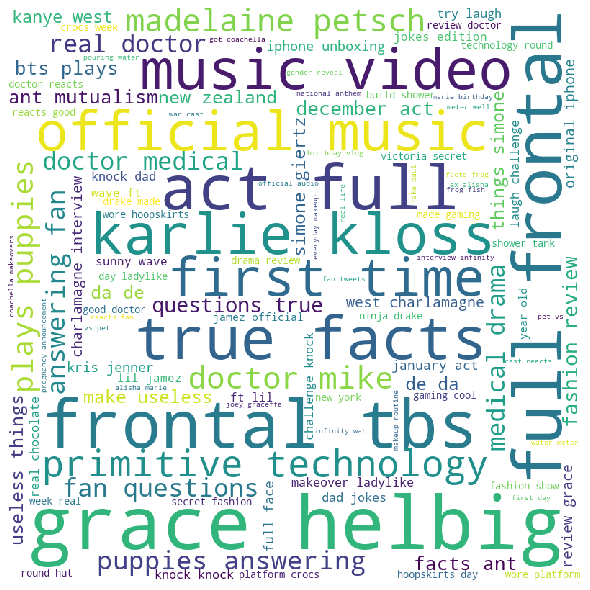

24


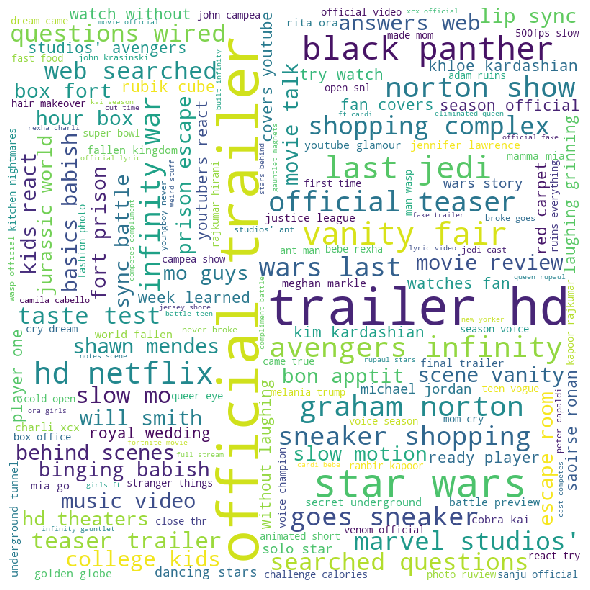

23


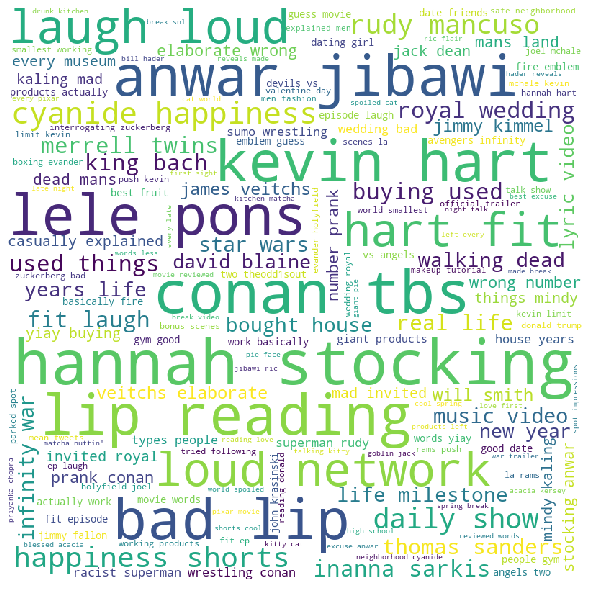

28


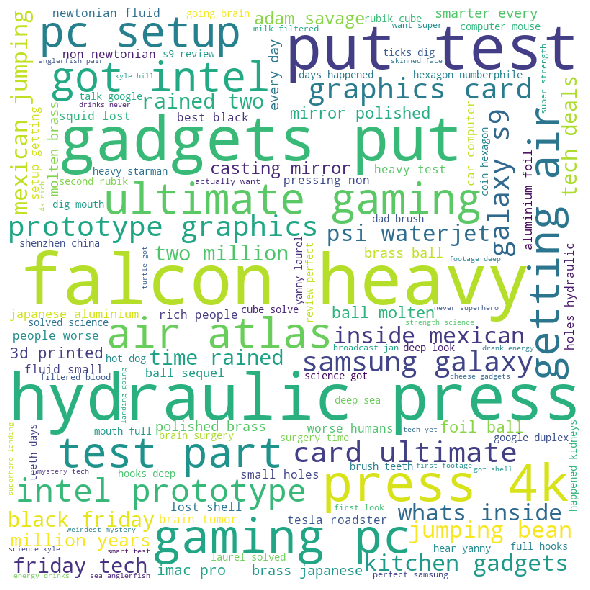

1


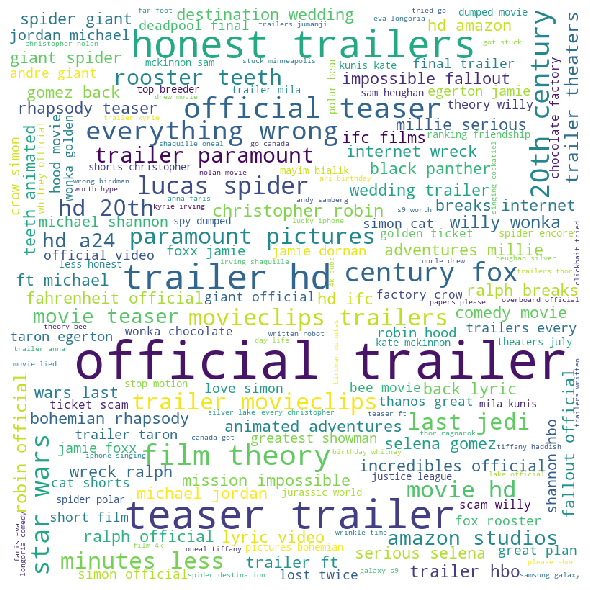

25


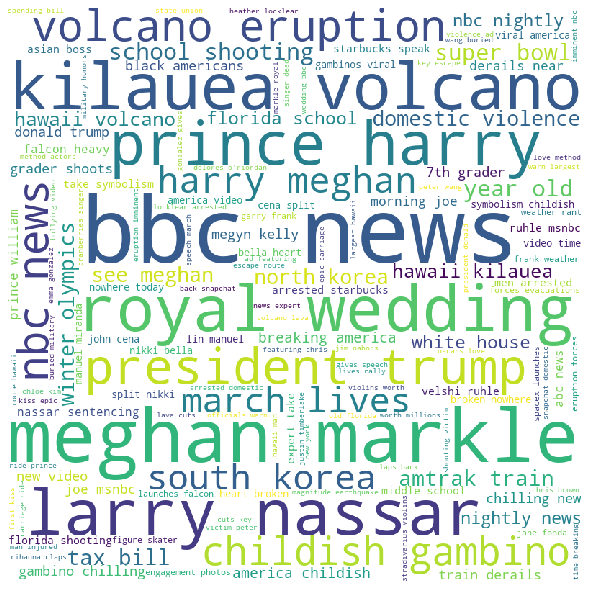

17


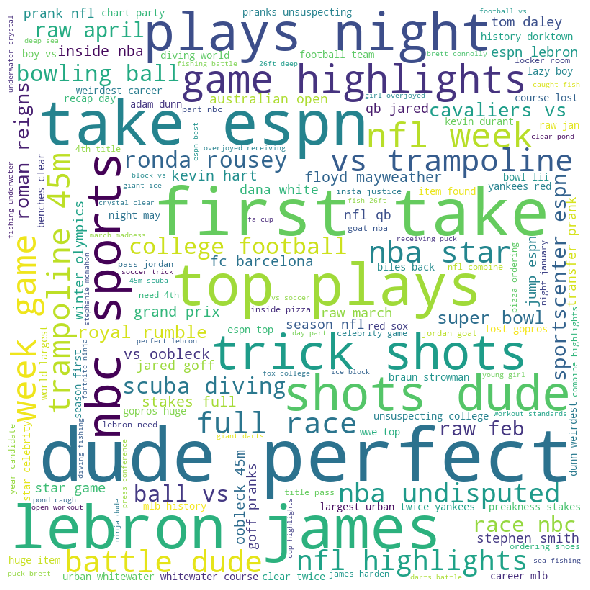

10


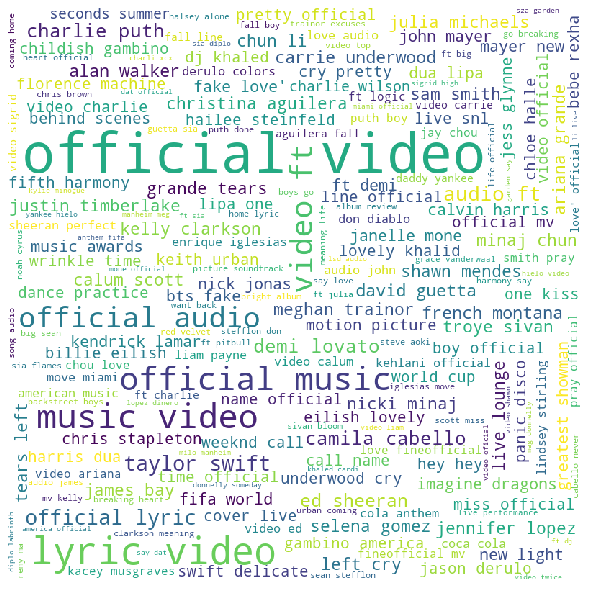

15


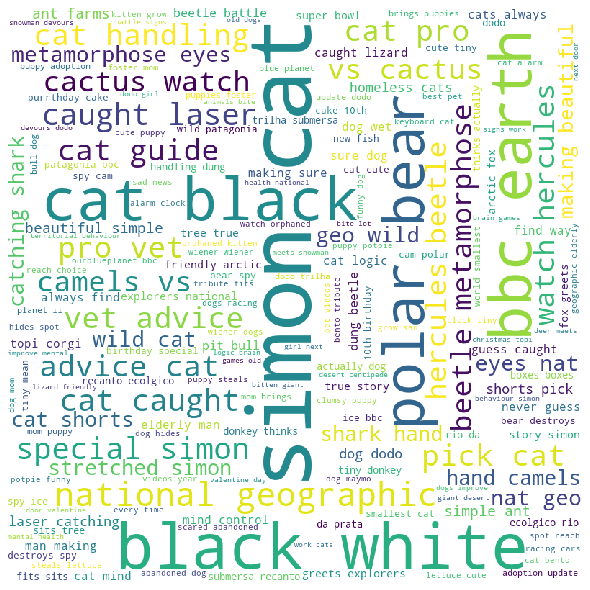

27


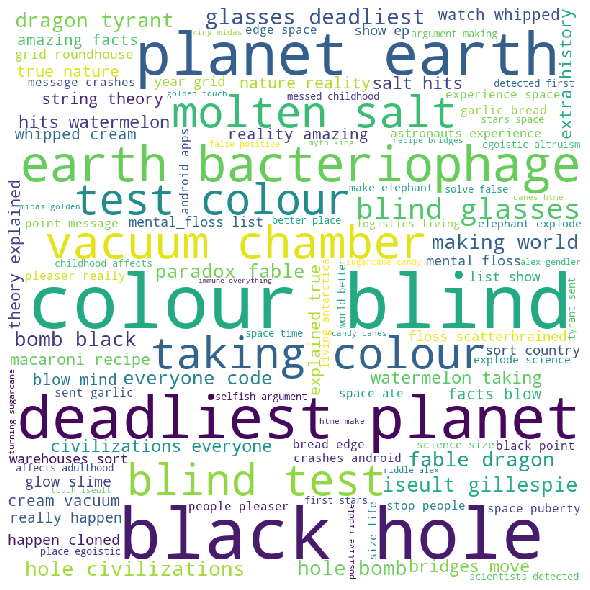

26


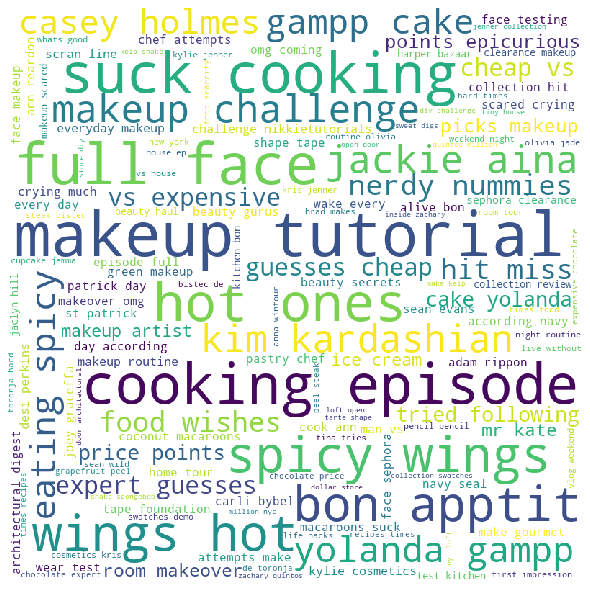

2


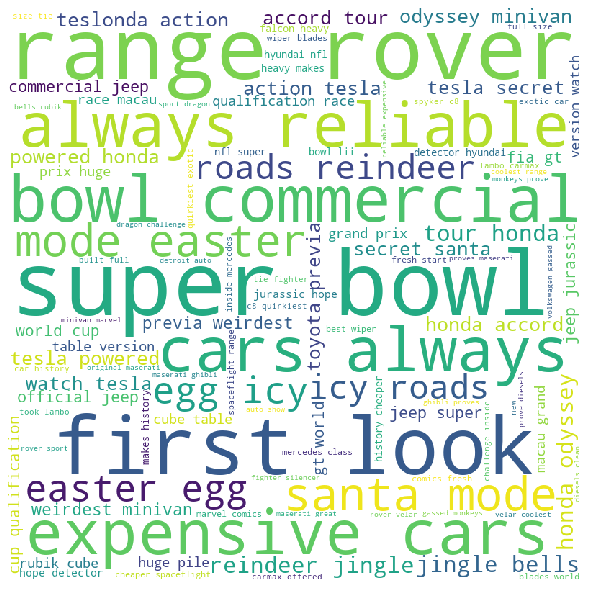

19


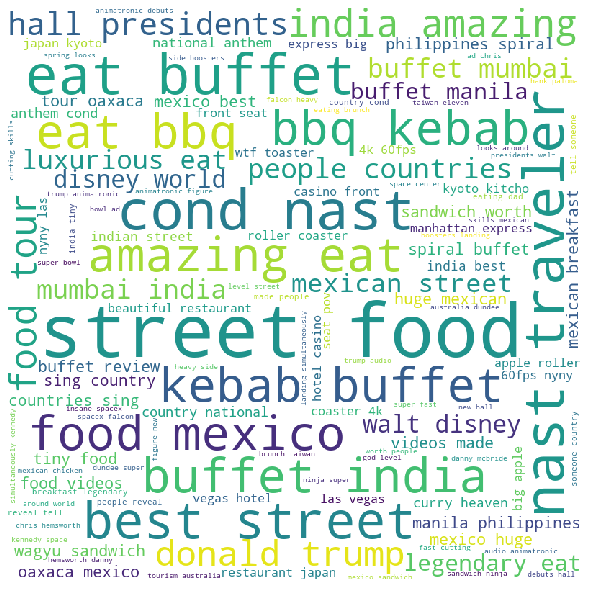

20


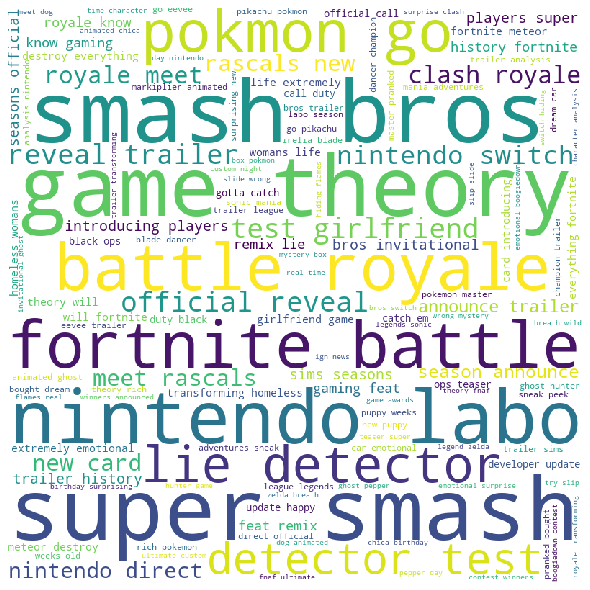

29


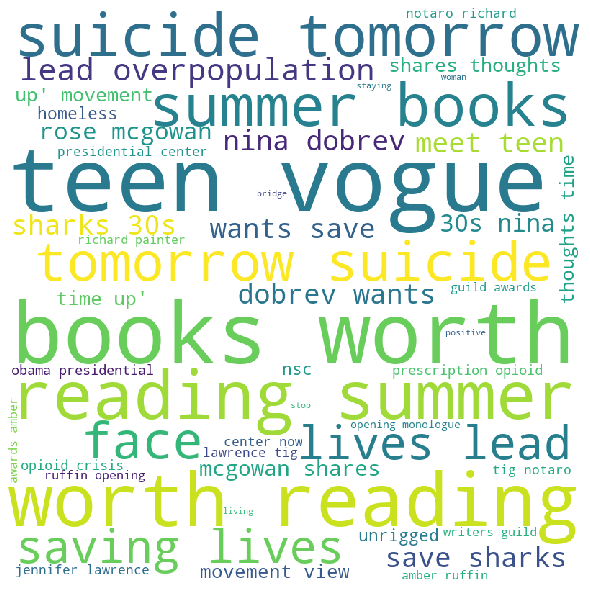

43


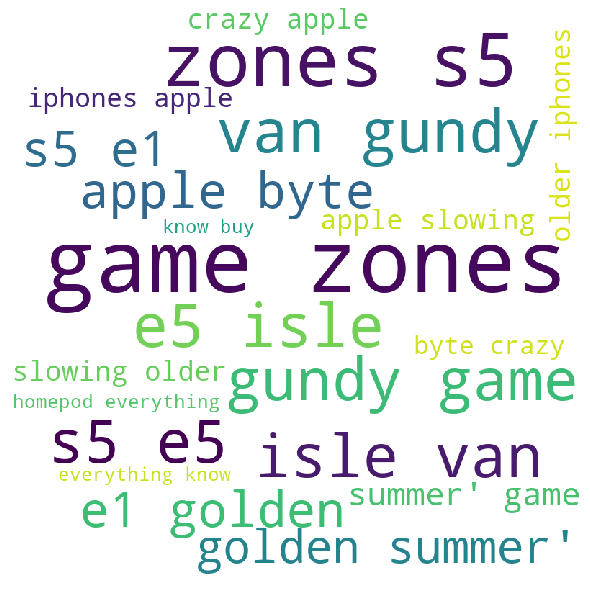

In [ ]:
stopwords = set(STOPWORDS)

for category_id in df['category_id'].unique():
  print(category_id)

  comment_words = ' '
  for val in df.loc[df['category_id']==category_id]['title']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
      tokens[i] = tokens[i].lower()

    for words in tokens:
      comment_words = comment_words + words + ' '
    
  wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

  # plot the WordCloud image                        
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
    
  plt.show() 